In [18]:
import pandas as pd
info_books = pd.read_csv('good_books_10k/good_books_tokenized.csv')

In [2]:
info_books = info_books[info_books['description'].map(lambda x: len(x) > 10)]

In [19]:
info_books.shape

(9608, 13)

In [4]:
from gensim.models.fasttext import FastText
model = FastText(min_count = 1)
model.build_vocab(sentences = list(info_books['description']))
model.train(sentences = list(info_books['description']), total_examples = len(list(info_books['description'])), epochs = 10, alpha = 0.01)

In [5]:
import numpy as np
def get_vector(text):
  vector = np.array([model.wv[word] for word in text]).mean(axis = 0)
  return vector

In [6]:
info_books['vector_description'] = info_books['description'].apply(get_vector)

In [13]:
info_books.reset_index(drop = True, inplace = True)

In [14]:
X = list(info_books['vector_description'])
X = np.array(X)
X.shape

(9608, 100)

In [9]:
from sklearn.cluster import KMeans
n_clusters = [2, 5, 10, 15, 20]
inertia = []
for n in n_clusters:
  book_kmeans = KMeans(n_clusters = n)
  book_kmeans.fit(X)
  inertia.append(book_kmeans.inertia_)

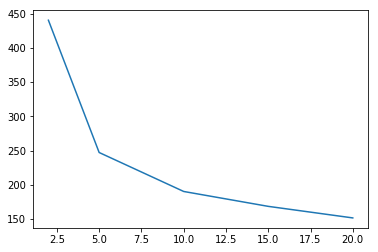

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(n_clusters, inertia)

In [11]:
book_kmeans = KMeans(n_clusters = 10).fit(X)
book_kmeans.labels_

array([7, 7, 5, ..., 0, 0, 0], dtype=int32)

In [12]:
len(book_kmeans.labels_)

9608

In [15]:
info_books['cluster'] = pd.Series(book_kmeans.labels_)

In [17]:
info_books.to_csv('good_books_10k/good_books_tokenized.csv', index = False)

In [ ]:
info_books[info_books['cluster'] == 1]

In [20]:
def get_cosine_similarity(one, two):
    return np.dot(one, two)/(np.linalg.norm(one) * np.linalg.norm(two))

In [21]:
a = np.array([1, 2, 3])
b = np.array([0, 1, 1])
get_cosine_similarity(a, b)

0.944911182523068

In [25]:
test_text = info_books['description'][1]

In [26]:
test_text

"['after', 'a', 'lifetime', 'of', 'bottling', 'up', 'his', 'magical', 'powers', 'harry', 'finally', 'feels', 'like', 'a', 'normal', 'kid', 'but', 'even', 'within', 'the', 'wizarding', 'community', 'he', 'is', 'special', 'he', 'is', 'the', 'boy', 'who', 'lived', 'the', 'only', 'person', 'to', 'have', 'ever', 'survived', 'a', 'killing', 'curse', 'inflicted', 'by', 'the', 'evil', 'lord', 'voldemort', 'who', 'launched', 'a', 'brutal', 'takeover', 'of', 'the', 'wizarding', 'world', 'only', 'to', 'vanish', 'after', 'failing', 'to', 'kill', 'harry']"

In [24]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 5, algorithm = 'ball_tree').fit(X)

In [28]:
distance, indices = nbrs.kneighbors(get_vector(test_text).reshape((-1, 1)))

ValueError: query data dimension must match training data dimension